In [1]:
%matplotlib inline

In [2]:
import jax

In [3]:
import scanpy as sc

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.generic import SinkhornProblem
import moscot.plotting as mpl
import pandas as pd
import os
import muon

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)
                         
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/

['default', 'despine']


In [4]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")

In [5]:
adata = mudata["rna"]
adata.obsm["X_MultiVI"] = mudata.obsm["X_MultiVI"]
adata.obsm["X_umap"] = mudata.obsm["X_umap"]
adata.obs["cell_type_refined"] = mudata.obs["cell_type_refined"]

In [6]:
def adapt_time(x):
    if x["stage"]=="E14.5":
        return 14.5
    if x["stage"]=="E15.5":
        return 15.5
    if x["stage"]=="E16.5":
        return 16.5
    raise ValueError

adata.obs['time'] = adata.obs.apply(adapt_time, axis=1)

In [7]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#42f5ec', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
      'Ngn3 high cycling': '#adf542',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}


In [8]:
adata.obs["cell_type"] = adata.obs["cell_type"].astype("category")
adata.uns["cell_type_colors"] = [color_dict[ct] for ct in adata.obs["cell_type"].cat.categories]

In [9]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [10]:
adata.obs["cell_type_per_time"] = adata.obs["cell_type"].astype("str")+"_"+adata.obs["time"].astype("str")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


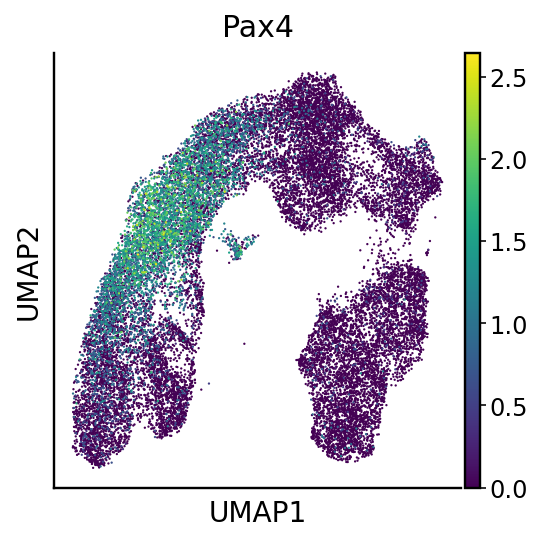

In [11]:
sc.pl.umap(adata, color="Pax4")

In [12]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [13]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/OT_encodrine_analysis/TemporalProblem.pkl")

In [41]:
sc.pp.normalize_total(tp0.adata)
sc.pp.log1p(tp0.adata)

In [111]:
tp0.pull(14.5, 15.5, data="cell_type", subset="Beta",  key_added = "Beta_pull_early", normalize=False)
tp0.pull(15.5, 16.5, data="cell_type", subset="Beta",  key_added = "Beta_pull_late", normalize=False)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning:

In [112]:
tp0.adata.obs["Beta_pull_early_adapted"] = tp0.adata.obs["Beta_pull_early"] * (tp0.adata.obs["cell_type"] == "Alpha")

In [113]:
tp0.adata.obs["Beta_pull_late_adapted"] = tp0.adata.obs["Beta_pull_late"] * (tp0.adata.obs["cell_type"] == "Alpha")

In [114]:
beta_drivers_early = tp0.compute_feature_correlation(obs_key="Beta_pull_early_adapted", annotation={"time": [14.5]})

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [115]:
beta_drivers_early.loc["Pax4"]

Beta_pull_early_adapted_corr      -1.000378e-01
Beta_pull_early_adapted_pval       4.403361e-12
Beta_pull_early_adapted_qval       2.476235e-10
Beta_pull_early_adapted_ci_low    -1.280804e-01
Beta_pull_early_adapted_ci_high   -7.183535e-02
Name: Pax4, dtype: float64

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


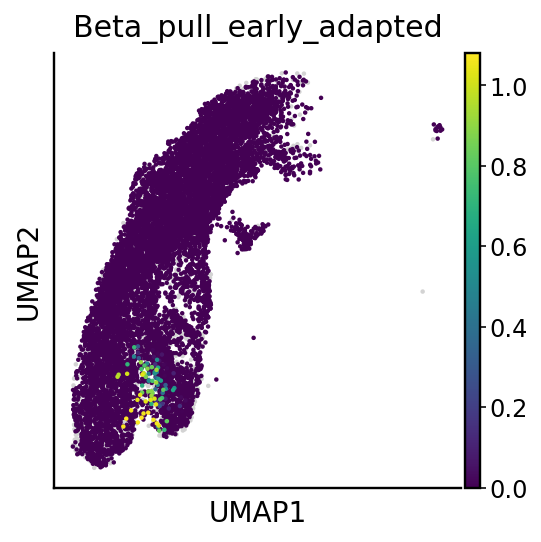

In [116]:
sc.pl.umap(tp0.adata, color="Beta_pull_early_adapted", s=20.0)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


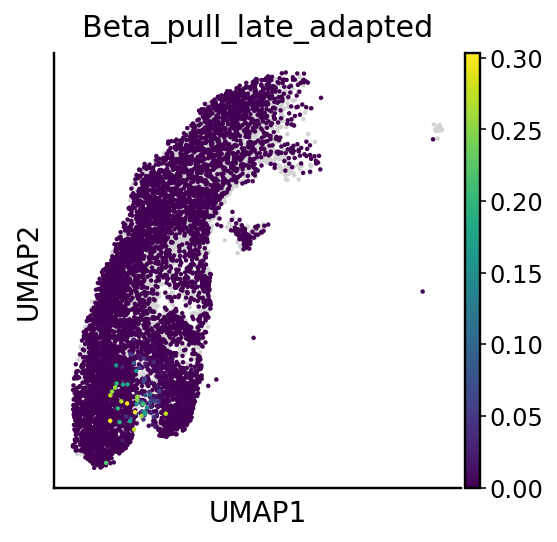

In [117]:
sc.pl.umap(tp0.adata, color="Beta_pull_late_adapted", s=20.0)

In [118]:
beta_drivers_late = tp0.compute_feature_correlation(obs_key="Beta_pull_late_adapted", annotation={"time": [15.5]})

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [119]:
beta_drivers_late.loc["Pax4"]

Beta_pull_late_adapted_corr      -0.056950
Beta_pull_late_adapted_pval       0.000041
Beta_pull_late_adapted_qval       0.001859
Beta_pull_late_adapted_ci_low    -0.084040
Beta_pull_late_adapted_ci_high   -0.029776
Name: Pax4, dtype: float64

In [121]:
tp0.adata.obs["beta_from_alpha_early"] = tp0.adata.obs.apply(lambda x: True if x["Beta_pull_early_adapted"]>1e-1 else False, axis=1)

In [120]:
tp0.adata.obs["beta_from_alpha_late"] = tp0.adata.obs.apply(lambda x: True if x["Beta_pull_late_adapted"]>1e-1 else False, axis=1)

In [122]:
alpha_adata_early = tp0.adata[(tp0.adata.obs["cell_type"]=="Alpha") & (tp0.adata.obs["time"]==14.5)]
alpha_adata_late = tp0.adata[(tp0.adata.obs["cell_type"]=="Alpha") & (tp0.adata.obs["time"]==15.5)]


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [123]:
alpha_adata_early.obs["beta_from_alpha_early"].value_counts()

beta_from_alpha_early
False    211
True      80
Name: count, dtype: int64

In [124]:
alpha_adata_late.obs["beta_from_alpha_late"].value_counts()

beta_from_alpha_late
False    559
True      29
Name: count, dtype: int64

In [125]:
alpha_adata_late.obs["beta_from_alpha_late"] = alpha_adata_late.obs["beta_from_alpha_late"].astype("category")
alpha_adata_early.obs["beta_from_alpha_early"] = alpha_adata_early.obs["beta_from_alpha_early"].astype("category")

/tmp/ipykernel_2718035/2868944553.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  alpha_adata_late.obs["beta_from_alpha_late"] = alpha_adata_late.obs["beta_from_alpha_late"].astype("category")
/tmp/ipykernel_2718035/2868944553.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  alpha_adata_early.obs["beta_from_alpha_early"] = alpha_adata_early.obs["beta_from_alpha_early"].astype("category")


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

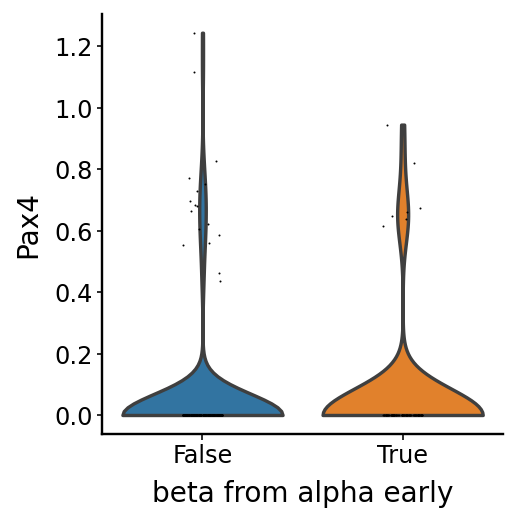

In [126]:
sc.pl.violin(alpha_adata_early, "Pax4", groupby="beta_from_alpha_early")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

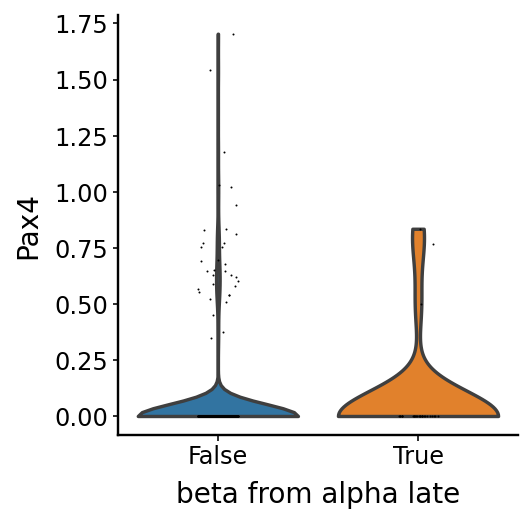

In [127]:
sc.pl.violin(alpha_adata_late, "Pax4", groupby="beta_from_alpha_late")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

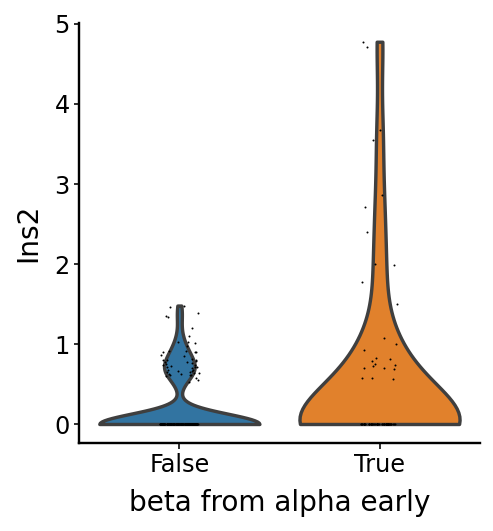

In [128]:
sc.pl.violin(alpha_adata_early, "Ins2", groupby="beta_from_alpha_early")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

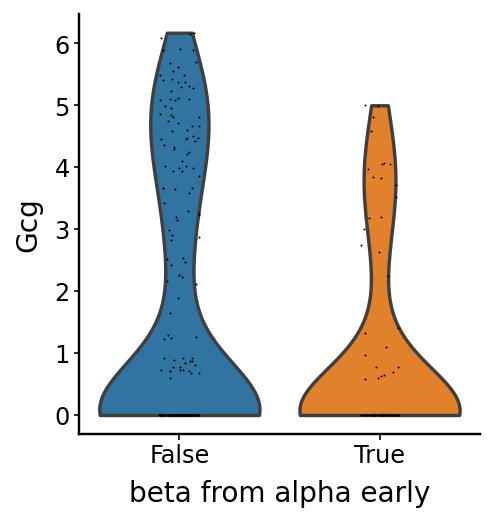

In [129]:
sc.pl.violin(alpha_adata_early, "Gcg", groupby="beta_from_alpha_early")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

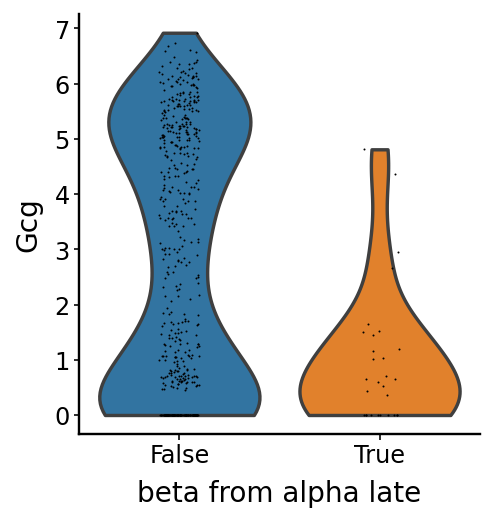

In [130]:
sc.pl.violin(alpha_adata_late, "Gcg", groupby="beta_from_alpha_late")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

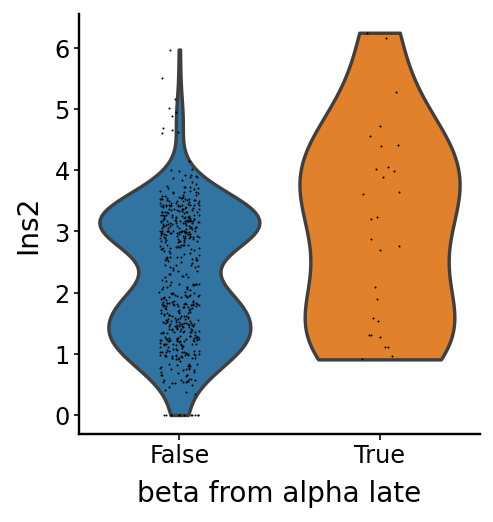

In [131]:
sc.pl.violin(alpha_adata_late, "Ins2", groupby="beta_from_alpha_late")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

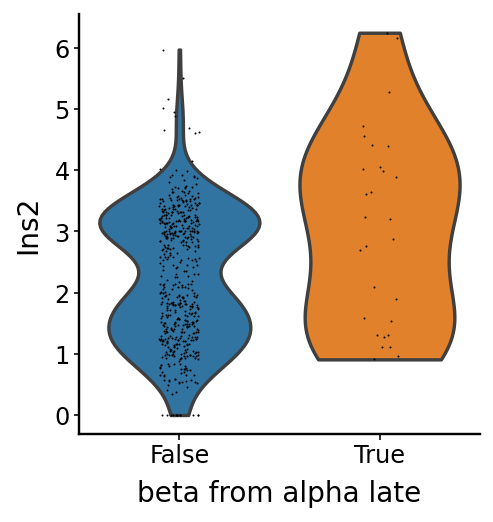

In [132]:
sc.pl.violin(alpha_adata_late, "Ins2", groupby="beta_from_alpha_late", legend_loc="left")